In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Data collection

In [29]:
now = datetime.now()

In [30]:
start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-08,24.825001,24.827499,24.512501,24.590000,21.833635,185426800
2014-09-09,24.770000,25.770000,24.035000,24.497499,21.751507,759385200
2014-09-10,24.502501,25.277500,24.440001,25.250000,22.419659,403478400
2014-09-11,25.102501,25.360001,24.905001,25.357500,22.515110,249412400
2014-09-12,25.302500,25.547501,25.270000,25.415001,22.566170,250504400
...,...,...,...,...,...,...
2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800
2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50042900
2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200


## Data exploration and visualization

In [ ]:
df

In [ ]:
type(df)

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.reset_index()

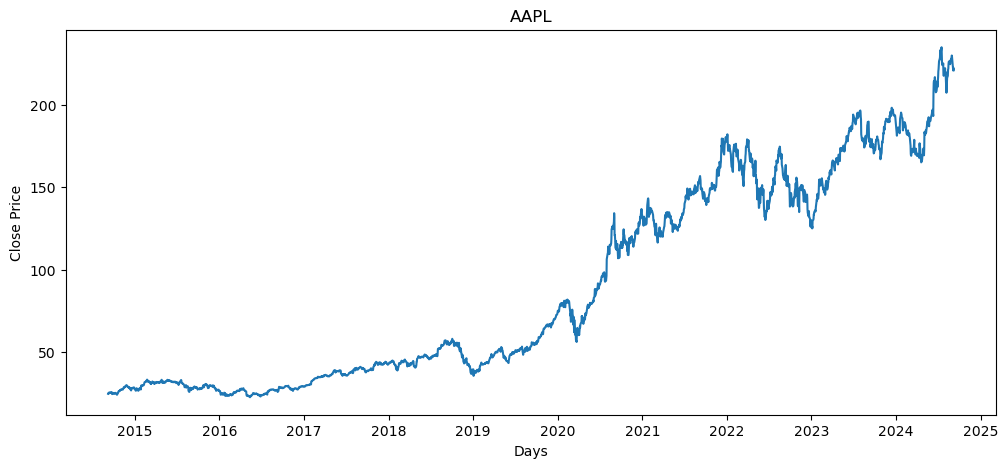

In [32]:
plt.figure(figsize=(12, 5));
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel("Days");
plt.ylabel("Close Price");

## Feature Engineering

In [33]:
df1 = pd.DataFrame({10,20,30,40,50,60,70,80,90,100})
dfi

NameError: name 'dfi' is not defined

In [34]:
df1

,0
0,100
1,70
2,40
3,10
4,80
5,50
6,20
7,90
8,60
9,30


In [ ]:
df1['MA_5'] = df1.rolling(5).mean()
df1

## 100 days moving average

In [35]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(102)

,Open,High,Low,Close,Adj Close,Volume,MA_100
Date,,,,,,,
2014-09-08,24.825001,24.827499,24.512501,24.590000,21.833635,185426800,NaN
2014-09-09,24.770000,25.770000,24.035000,24.497499,21.751507,759385200,NaN
2014-09-10,24.502501,25.277500,24.440001,25.250000,22.419659,403478400,NaN
2014-09-11,25.102501,25.360001,24.905001,25.357500,22.515110,249412400,NaN
2014-09-12,25.302500,25.547501,25.270000,25.415001,22.566170,250504400,NaN
...,...,...,...,...,...,...,...
2015-01-27,28.105000,28.120001,27.257500,27.285000,24.331600,382274800,NaN
2015-01-28,29.407499,29.530001,28.827499,28.827499,25.707132,585908400,NaN
2015-01-29,29.080000,29.797501,28.889999,29.725000,26.507488,337745600,26.93105


In [ ]:
plt.plot(df['MA_100']);

In [ ]:
plt.figure(figsize=(12, 5));
plt.plot(df.Close);
plt.plot(df['MA_100'], "r");
plt.title("100days moving average");
plt.xlabel("Days");
plt.ylabel("Close Price");

## 200 days moving average

In [ ]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

In [ ]:
plt.plot(df['MA_200'], "g");

In [ ]:
plt.figure(figsize=(12, 5));
plt.plot(df.Close);
plt.plot(df['MA_100'], "r");
plt.plot(df['MA_200'], "g");
plt.title("100 and 200 days moving average");
plt.xlabel("Days");
plt.ylabel("Close Price");

## calculating the % changes in eachtrading session

In [ ]:
df['Percentage Change'] = df.Close.pct_change()
df[['Close','Percentage Change']]

In [ ]:
plt.figure(figsize=(12,5));
plt.plot(df['Percentage Change']) 

## Data pre-processing

In [36]:
df.shape

(2517, 7)

#### splitting data into Training and Testing Data

In [54]:
# Split data into 70% training and 30% testing
training_data = pd.DataFrame(df.Close[0:int(len(df)*0.7)])  # 0 to 70% for training
testing_data = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))]) 

In [55]:
training_data

,Close
Date,
2014-09-08,24.590000
2014-09-09,24.497499
2014-09-10,25.250000
2014-09-11,25.357500
2014-09-12,25.415001
...,...
2021-08-27,148.600006
2021-08-30,153.119995
2021-08-31,151.830002


In [ ]:
testing_data

#### scale down the data between 0 and 1

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [56]:
training_data_array = scaler.fit_transform(training_data)
training_data

,Close
Date,
2014-09-08,24.590000
2014-09-09,24.497499
2014-09-10,25.250000
2014-09-11,25.357500
2014-09-12,25.415001
...,...
2021-08-27,148.600006
2021-08-30,153.119995
2021-08-31,151.830002


In [ ]:
training_data_array

In [57]:
x_train = []  # List to store the input sequences
y_train = []  # List to store the corresponding target values

for i in range(100, training_data_array.shape[0]):
    x_train.append(training_data_array[i-100:i])
    y_train.append(training_data_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)


## Build the model

In [39]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [40]:
model = Sequential()
model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## Model traning

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0171
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.6281e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 4.0140e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.0076e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.4476e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 4.5301e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 3.5393e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 3.2289e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 3.4214e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 3.3171e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.9609e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.8725e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.6870e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 3.7653e-04
Epoch 15/50
52/52

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

#### Save trained model

In [61]:
model.save('stock_prediction_model.keras')

## Preparing test data fro prediction

In [65]:
past_hundred_days_data = training_data.tail(100)

In [69]:
final_df = pd.concat([past_hundred_days_data, testing_data], ignore_index=True)

In [70]:
final_df

,Close
0,132.029999
1,134.500000
2,134.160004
3,134.839996
4,133.110001
...,...
851,229.000000
852,222.770004
853,220.850006
854,222.380005


In [72]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08264169],
       [0.10468543],
       [0.1016511 ],
       [0.10771975],
       [0.09228026],
       [0.09576084],
       [0.08183851],
       [0.10307907],
       [0.10664885],
       [0.10370372],
       [0.09647483],
       [0.09558231],
       [0.07755475],
       [0.08719318],
       [0.04533692],
       [0.04756813],
       [0.06220445],
       [0.06639901],
       [0.03641233],
       [0.02802326],
       [0.        ],
       [0.01963413],
       [0.04176707],
       [0.03123605],
       [0.01856316],
       [0.01713526],
       [0.04051763],
       [0.02373943],
       [0.03864348],
       [0.03685859],
       [0.03641233],
       [0.02240073],
       [0.01642127],
       [0.01347614],
       [0.02043731],
       [0.00687197],
       [0.02784473],
       [0.027934  ],
       [0.03543062],
       [0.0389112 ],
       [0.02980815],
       [0.04087462],
       [0.06880855],
       [0.06131193],
       [0.06586342],
       [0.08049974],
       [0.06863016],
       [0.085

In [73]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [74]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [75]:
x_test

array([[[0.08264169],
        [0.10468543],
        [0.1016511 ],
        ...,
        [0.25934853],
        [0.26541718],
        [0.2755912 ]],

       [[0.10468543],
        [0.1016511 ],
        [0.10771975],
        ...,
        [0.26541718],
        [0.2755912 ],
        [0.28139227]],

       [[0.1016511 ],
        [0.10771975],
        [0.09228026],
        ...,
        [0.2755912 ],
        [0.28139227],
        [0.30272202]],

       ...,

       [[0.4664881 ],
        [0.47996431],
        [0.4455154 ],
        ...,
        [0.95510921],
        [0.94805884],
        [0.89245871]],

       [[0.47996431],
        [0.4455154 ],
        [0.41597505],
        ...,
        [0.94805884],
        [0.89245871],
        [0.87532352]],

       [[0.4455154 ],
        [0.41597505],
        [0.40365907],
        ...,
        [0.89245871],
        [0.87532352],
        [0.88897812]]])

In [76]:
y_test

array([0.28139227, 0.30272202, 0.28862116, 0.27933965, 0.2338242 ,
       0.23900048, 0.22623825, 0.23435966, 0.23221771, 0.20785363,
       0.18000896, 0.18438192, 0.20597954, 0.21472559, 0.21552877,
       0.20169564, 0.17081665, 0.17902725, 0.16715753, 0.17742075,
       0.1460955 , 0.16367695, 0.17161983, 0.18313248, 0.1796519 ,
       0.17884872, 0.16724673, 0.16189206, 0.18732705, 0.19696562,
       0.21222672, 0.23194998, 0.23641227, 0.23837569, 0.23132533,
       0.23087907, 0.23694786, 0.2327533 , 0.26595277, 0.24123163,
       0.23373501, 0.24319505, 0.2563142 , 0.25158418, 0.25443998,
       0.24694336, 0.25024541, 0.22445336, 0.2240071 , 0.24292732,
       0.24301652, 0.2519411 , 0.27416337, 0.31325297, 0.33717093,
       0.3413655 , 0.34484608, 0.3495761 , 0.30379293, 0.33440433,
       0.37956272, 0.3748327 , 0.36581878, 0.34868359, 0.37974125,
       0.43203919, 0.46684516, 0.46220434, 0.50584556, 0.47273542,
       0.46015172, 0.50450693, 0.44167776, 0.43168227, 0.41927

## Making prdiction

In [77]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


In [78]:
y_predicted

array([[0.2730244 ],
       [0.27933556],
       [0.29347926],
       [0.29378438],
       [0.28644928],
       [0.25754523],
       [0.24319303],
       [0.2324147 ],
       [0.23249942],
       [0.23392984],
       [0.22297263],
       [0.2016032 ],
       [0.19090319],
       [0.19771042],
       [0.20911804],
       [0.21647543],
       [0.21242881],
       [0.19277495],
       [0.18341583],
       [0.17464632],
       [0.17520854],
       [0.16281566],
       [0.16211152],
       [0.16779348],
       [0.17775032],
       [0.18232378],
       [0.18314314],
       [0.17704669],
       [0.16973647],
       [0.17749584],
       [0.18932343],
       [0.20397687],
       [0.22192058],
       [0.23383042],
       [0.23931593],
       [0.23684344],
       [0.23364022],
       [0.23491049],
       [0.23436794],
       [0.2510083 ],
       [0.2498518 ],
       [0.24235895],
       [0.24226007],
       [0.25028527],
       [0.2534153 ],
       [0.25561816],
       [0.25255057],
       [0.251

In [79]:
y_test

array([0.28139227, 0.30272202, 0.28862116, 0.27933965, 0.2338242 ,
       0.23900048, 0.22623825, 0.23435966, 0.23221771, 0.20785363,
       0.18000896, 0.18438192, 0.20597954, 0.21472559, 0.21552877,
       0.20169564, 0.17081665, 0.17902725, 0.16715753, 0.17742075,
       0.1460955 , 0.16367695, 0.17161983, 0.18313248, 0.1796519 ,
       0.17884872, 0.16724673, 0.16189206, 0.18732705, 0.19696562,
       0.21222672, 0.23194998, 0.23641227, 0.23837569, 0.23132533,
       0.23087907, 0.23694786, 0.2327533 , 0.26595277, 0.24123163,
       0.23373501, 0.24319505, 0.2563142 , 0.25158418, 0.25443998,
       0.24694336, 0.25024541, 0.22445336, 0.2240071 , 0.24292732,
       0.24301652, 0.2519411 , 0.27416337, 0.31325297, 0.33717093,
       0.3413655 , 0.34484608, 0.3495761 , 0.30379293, 0.33440433,
       0.37956272, 0.3748327 , 0.36581878, 0.34868359, 0.37974125,
       0.43203919, 0.46684516, 0.46220434, 0.50584556, 0.47273542,
       0.46015172, 0.50450693, 0.44167776, 0.43168227, 0.41927

In [81]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [82]:
y_predicted

array([153.36238, 154.06955, 155.65436, 155.68854, 154.86664, 151.62794,
       150.01978, 148.81207, 148.82156, 148.98184, 147.75407, 145.35963,
       144.16069, 144.92345, 146.20168, 147.02608, 146.57265, 144.37044,
       143.32175, 142.33913, 142.40211, 141.01349, 140.93459, 141.57126,
       142.68692, 143.19939, 143.29118, 142.60808, 141.78897, 142.6584 ,
       143.98369, 145.62561, 147.6362 , 148.9707 , 149.58536, 149.3083 ,
       148.94939, 149.09172, 149.03093, 150.89548, 150.7659 , 149.92632,
       149.91524, 150.81445, 151.16519, 151.41202, 151.0683 , 150.97746,
       149.48598, 148.49083, 149.16434, 149.83757, 150.71274, 152.4729 ,
       155.80678, 159.12802, 160.86255, 161.48802, 161.78743, 158.92906,
       159.10297, 162.57176, 164.44193, 164.44766, 163.0196 , 164.17378,
       168.52574, 173.25554, 174.85759, 177.95946, 176.8519 , 174.90732,
       177.21448, 174.21838, 171.84747, 170.24203, 171.83054, 174.64491,
       176.35504, 179.37637, 179.87842, 179.65666, 

In [83]:
y_test

array([154.30000305, 156.69000244, 155.11000061, 154.07000732,
       148.97000122, 149.55000305, 148.11999512, 149.02999878,
       148.78999329, 146.05999756, 142.94000244, 143.42999268,
       145.8500061 , 146.83000183, 146.91999817, 145.36999512,
       141.91000366, 142.83000183, 141.5       , 142.6499939 ,
       139.13999939, 141.11000061, 142.        , 143.28999329,
       142.8999939 , 142.80999756, 141.50999451, 140.91000366,
       143.75999451, 144.83999634, 146.55000305, 148.75999451,
       149.25999451, 149.47999573, 148.69000244, 148.63999939,
       149.32000732, 148.8500061 , 152.57000732, 149.80000305,
       148.96000671, 150.02000427, 151.49000549, 150.96000671,
       151.27999878, 150.44000244, 150.80999756, 147.91999817,
       147.86999512, 149.99000549, 150.        , 151.        ,
       153.49000549, 157.86999512, 160.55000305, 161.02000427,
       161.41000366, 161.94000244, 156.80999756, 160.24000549,
       165.30000305, 164.77000427, 163.75999451, 161.83

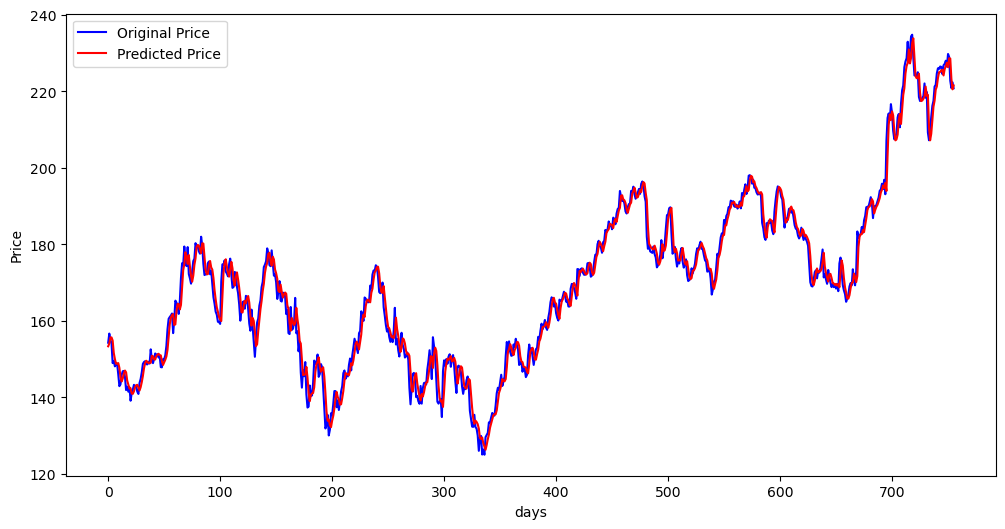

In [85]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('days')
plt.ylabel('Price')
plt.legend()

(180.0, 230.0)

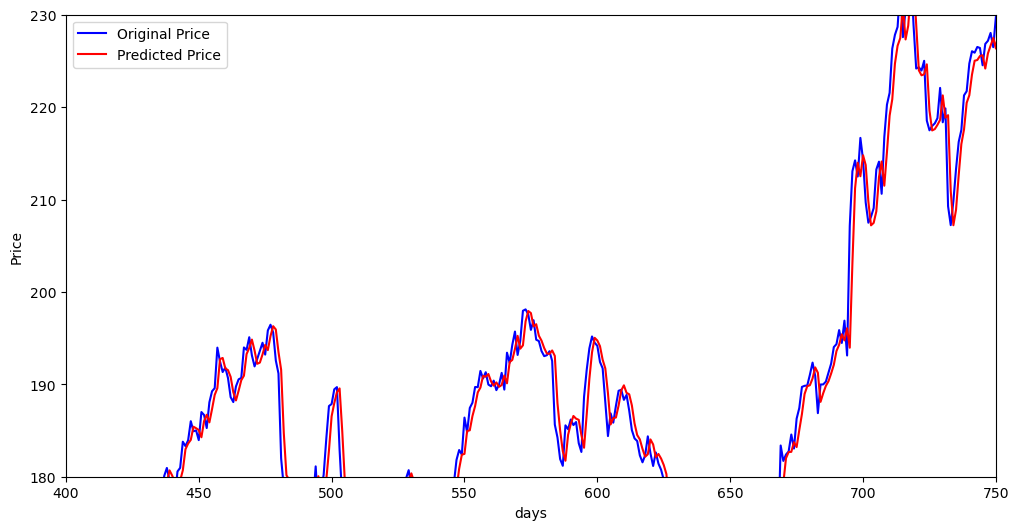

In [86]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('days')
plt.ylabel('Price')
plt.legend()
plt.xlim(400,750)
plt.ylim(180,230)

## Model Evaluation

#### Mean squared error

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
mse = mean_squared_error(y_test, y_predicted)

In [89]:
mse

9.59852573839087

#### Root Mean squared error

In [90]:
rmse = np.sqrt(mse)

In [91]:
mse

9.59852573839087

In [92]:
rmse

3.0981487598872444

#### Root-Squared

In [96]:
r2 = r2_score(y_test, y_predicted)

In [97]:
r2

0.9812732858872248